# Chapitre 3: ACP

## 3.1 Standardisation

In [1]:
import numpy as np
import pandas as pds
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
stocks = pds.read_excel("dataset.xlsx")
stocks

In [ ]:
stocks.iloc[0:500,:].plot(figsize =(15,10),title="Non standardisé")

In [4]:
stocks_ = stocks.iloc[0:500,1:8]
colonne = stocks_.columns.tolist()

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [6]:
stocks_ = stocks_.values
stocks_sc = sc.fit_transform(stocks_)

In [ ]:
df_sc = pds.DataFrame(stocks_sc, columns=colonne)
df_sc.plot(figsize =(15,10),title="Standardisé")

In [16]:
##### Correlation entre les pourcentage de variations
##### Uniquement içi pour mieux connaître la base de donnée et n'a pas d'intérêt pour ce chapitre
pds.DataFrame(stocks_, columns=colonne).pct_change(1).dropna().corr()

,AMZN,BRENT,CAC40,NQ100,DJI30,DAX30,GOLD
AMZN,1.000000,0.137795,0.236338,0.438707,0.359452,0.241062,0.096931
BRENT,0.137795,1.000000,0.383840,0.391821,0.394521,0.376619,0.250453
CAC40,0.236338,0.383840,1.000000,0.752943,0.819231,0.910571,0.083189
NQ100,0.438707,0.391821,0.752943,1.000000,0.844453,0.753506,0.144087
DJI30,0.359452,0.394521,0.819231,0.844453,1.000000,0.820486,0.126624
DAX30,0.241062,0.376619,0.910571,0.753506,0.820486,1.000000,0.073972
GOLD,0.096931,0.250453,0.083189,0.144087,0.126624,0.073972,1.000000


## 3.2 ACP sur le dataset fleurs d'iris

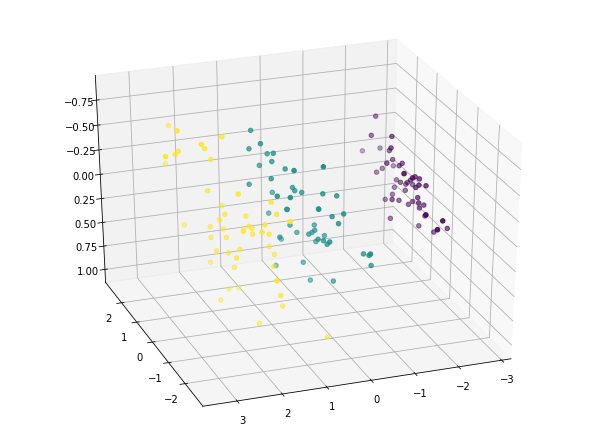

In [26]:
##### Imporation de la base de données
from sklearn import datasets
iris = datasets.load_iris()

##### Standardisation de la base de données
##### Dans une variable iris_sc
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

iris_sc = sc.fit_transform(iris.data)

##### Mise en place de l'acp dans la variable new_data
from sklearn.decomposition import PCA

acp = PCA(n_components = 3)
new_data = acp.fit_transform(iris_sc)

##### Algorithme 
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
label = km.fit_predict(new_data)


##### Afiichage 
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(new_data[:,0], new_data[:,1], new_data[:,2], c=iris.target)

In [20]:
dataset = pds.concat((pds.DataFrame(iris.data), pds.DataFrame(iris.target)), axis=1)
dataset.columns = ["Longueur sépal", "Largeur sépal",
                  "Longueur pétale", "Largeur pétale", "Éspèce"]

In [21]:
dataset

,Longueur sépal,Largeur sépal,Longueur pétale,Largeur pétale,Éspèce
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


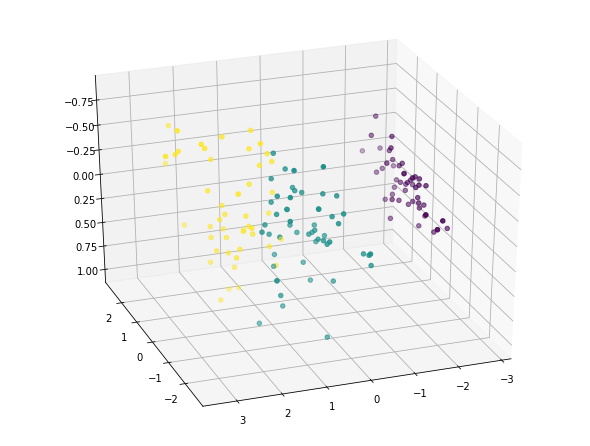

In [34]:
##### Algorithme 
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
label = km.fit_predict(new_data)


##### Afiichage 
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(new_data[:,0], new_data[:,1], new_data[:,2], c=label)

## 3.3 ACP finance

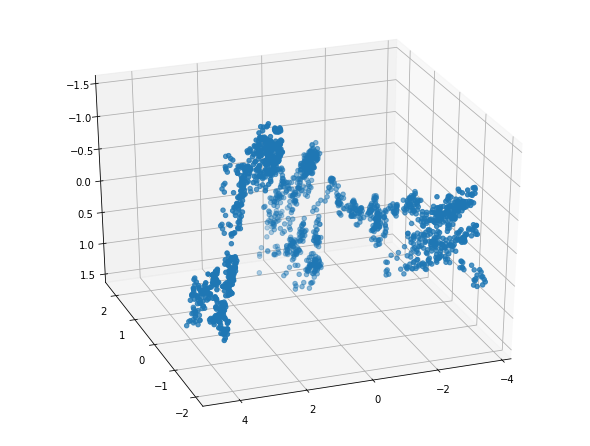

In [35]:
##### Importation de la base de données disponible sur github
stocks = pds.read_excel("dataset.xlsx")

##### Importation de la fonction de standardisation
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

##### On enlève la colonne des dates car numpy veut des valeurs numériques et on standardise
stocks_ = stocks.iloc[:,1:8]
stocks_sc = sc.fit_transform(stocks_)


##### Mise en place de l'acp dans la variable new_data
from sklearn.decomposition import PCA

acp = PCA(n_components = 3)
new_data = acp.fit_transform(stocks_sc)


##### Affichage 
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(new_data[:,0], new_data[:,1], new_data[:,2])

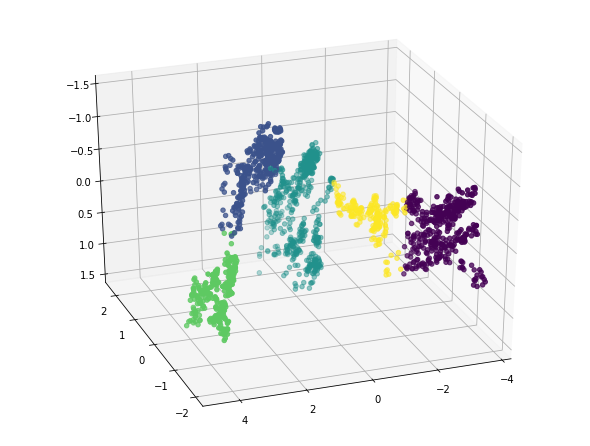

In [36]:
##### Importation de la base de données disponible sur github
stocks = pds.read_excel("dataset.xlsx")

##### Importation de la fonction de standardisation
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

##### On enlève la colonne des dates car numpy veut des valeurs numériques et on standardise
stocks_ = stocks.iloc[:,1:8]
stocks_sc = sc.fit_transform(stocks_)


##### Mise en place de l'acp dans la variable new_data
from sklearn.decomposition import PCA

acp = PCA(n_components = 3)
new_data = acp.fit_transform(stocks_sc)

##### Algorithme 
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5)
label = km.fit_predict(new_data)

##### Affichage 
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(new_data[:,0], new_data[:,1], new_data[:,2], c=label)